In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv("employe.csv")

In [ ]:
data.head(15)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0


In [ ]:
data = data.dropna()


In [ ]:
data.rename(columns=lambda x: x.strip().lower(), inplace=True)

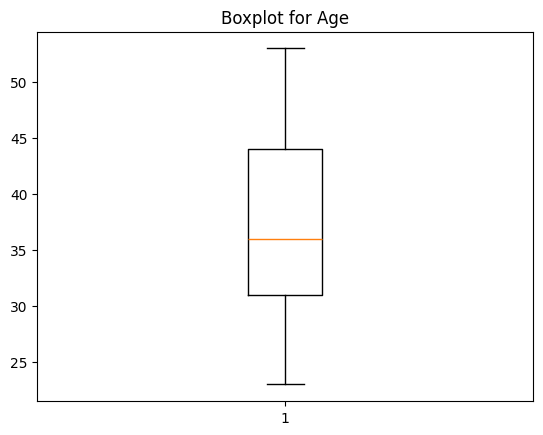

In [ ]:
plt.boxplot(data['age'])
plt.title("Boxplot for Age")
plt.show()

In [ ]:
data = data[(data['age'] >= 17) & (data['age'] <= 75)]

In [ ]:
encoder = LabelEncoder()
data['gender'] = encoder.fit_transform(data['gender'])
data['education level'] = encoder.fit_transform(data['education level'])
data['job title'] = encoder.fit_transform(data['job title'])

In [ ]:
X = data.drop(columns=['salary'])
Y = data['salary']   # Real salary ko predict karna hai


In [ ]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)


In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("✅ Accuracy:", round(accuracy * 100, 2), "%")
print("🔍 First 10 Predictions:", y_pred[:10])

✅ Accuracy: 30.67 %
🔍 First 10 Predictions: [170000.  60000. 110000.  90000. 150000. 160000. 130000. 105000.  55000.
  95000.]


In [ ]:
print(Y.value_counts())


salary
40000.0     31
50000.0     22
95000.0     22
120000.0    20
180000.0    20
45000.0     18
150000.0    18
90000.0     18
160000.0    17
60000.0     17
110000.0    17
170000.0    16
130000.0    14
100000.0    14
140000.0    14
35000.0     13
80000.0     12
55000.0     10
85000.0     10
65000.0      9
70000.0      9
105000.0     6
75000.0      4
190000.0     4
115000.0     3
200000.0     2
135000.0     2
250000.0     2
175000.0     2
125000.0     1
30000.0      1
220000.0     1
185000.0     1
145000.0     1
155000.0     1
350.0        1
Name: count, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
import pandas as pd

# Step 1: Define X and Y
X = data.drop(columns=['salary'])  # Features
Y = data['salary']  # Target

# Step 2: Encode categorical features
cat_cols = ['gender', 'education level', 'job title']  # Use exact column names
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col])

# Step 3: Impute missing values
imputer = SimpleImputer(strategy='most_frequent')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Step 4: Feature scaling for numeric columns
scaler = StandardScaler()
X[['age', 'years of experience']] = scaler.fit_transform(X[['age', 'years of experience']])

# Step 5: Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 6: Train model
model = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42)
model.fit(x_train, y_train)

# Step 7: Predict and evaluate
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ MAE:", round(mae, 2))
print("📈 R² Score (Accuracy):", round(r2 * 100, 2), "%")



✅ MAE: 9198.41
📈 R² Score (Accuracy): 93.04 %


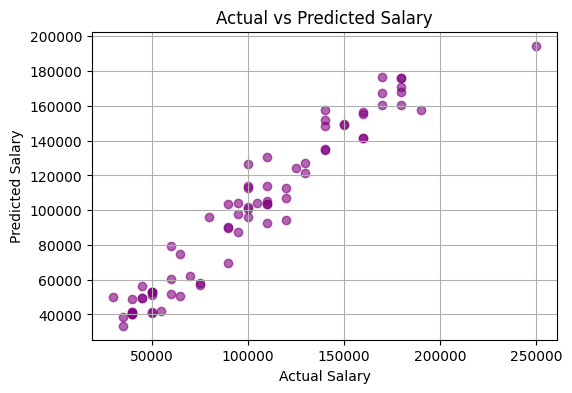

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.6, color='purple')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.grid(True)
plt.show()


               Feature  Importance
0                  age    0.564201
4  years of experience    0.290293
3            job title    0.116204
2      education level    0.027019
1               gender    0.002283


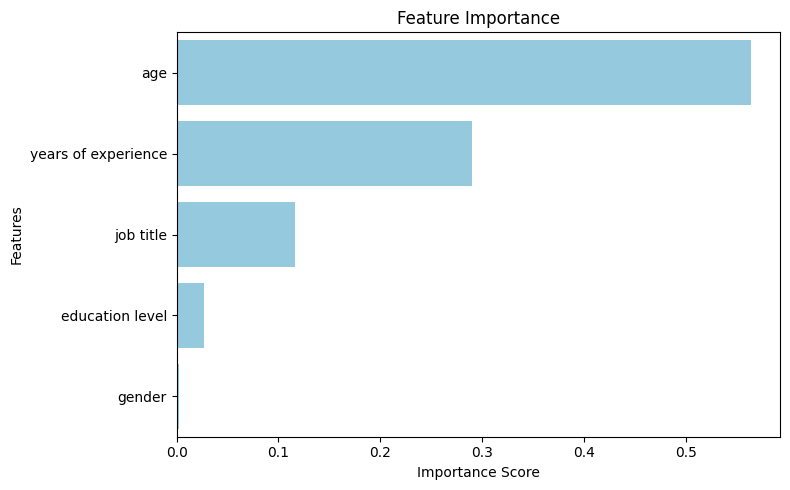

In [ ]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Save the model
with open('salary_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Feature importance
feature_names = X.columns
importances = model.feature_importances_

# Create DataFrame
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print to verify
print(importance_df)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()



In [ ]:
import pickle

# Assuming your model is named `model`
with open("salary_model.pkl", "wb") as f:
    pickle.dump(model, f)

